This code notebook implements binomial and black-scholes models of option pricing and compares them using graphs.
The individual code blocks can be run and then the corresponding results will be displayed as cell outputs.
The code blocks are written in a certain sequence which should be obeyed to avoid any errors.  

In [1]:
import numpy as np                    # Library to be used for fast and vectorized calculations.
import matplotlib.pyplot as plt       # Library to be used for plotting graphs, thereby increasing visual clarity and better performance mapping of models.

In [2]:
def monte_carlo_binomial_option_pricing(current_price, strike_price, interest_rate, volatility, expiration_time, num_steps):
    """
    Binomial option pricing using the Cox-Ross-Rubinstein model.

    Args:
        current_price (float): Current price of the underlying asset.
        strike_price (float): Strike price of the option.
        interest_rate (float): Risk-free interest rate.
        volatility (float): Volatility of the underlying asset.
        expiration_time (float): Time to expiration of the option.
        num_steps (int): Number of simulation paths to generate.

    Returns:
        float: Estimated option price.
    """

    # The algorithm starts here. There are a lots of local variables defined so as to simplify the expressions.
    dt = expiration_time / num_steps
    u = np.exp(volatility * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(interest_rate * dt) - d) / (u - d)

    # Defined using np array functions.
    stock_prices = np.zeros((num_steps + 1, num_steps + 1))
    option_values = np.zeros((num_steps + 1, num_steps + 1))

    stock_prices[0, 0] = current_price

    for i in range(1, num_steps + 1):
        stock_prices[i, 0] = stock_prices[i - 1, 0] * u
        for j in range(1, i + 1):
            stock_prices[i, j] = stock_prices[i - 1, j - 1] * d

    option_values[num_steps, :] = np.maximum(stock_prices[num_steps, :] - strike_price, 0)

    for i in range(num_steps - 1, -1, -1):
        for j in range(i + 1):
            option_values[i, j] = np.exp(-interest_rate * dt) * (p * option_values[i + 1, j] + (1 - p) * option_values[i + 1, j + 1])

        option_price = option_values[0, 0]

    return option_price

In [3]:
# All the variables specified below can be changed to produce custom results.
stock_price = 100
strike_price = 105.0
interest_rate = 0.05
volatility = 0.2
expiration_time = 0.5
num_steps = 1000

option_price = monte_carlo_binomial_option_pricing(stock_price, strike_price, interest_rate, volatility, expiration_time, num_steps)
print("Option price is: ", option_price)              # Prinitng the result needed.

Option price is:  4.58290145705384


In [4]:
def monte_carlo_black_scholes_option_pricing(current_price, strike_price, interest_rate, volatility, expiration_time, num_simulations):
    """This function implements Monte Carlo simulation for option pricing using the Black-Scholes model.

    Args:
        current_price (float): Current price of the underlying asset.
        strike_price (float): Strike price of the option.
        interest_rate (float): Risk-free interest rate.
        volatility (float): Volatility of the underlying asset.
        expiration_time (float): Time to expiration of the option.
        num_steps (int): Number of simulation paths to generate.

    Returns:
        float: Estimated option price.

    """
    # The algorithm starts here. There are a lots of local variables defined so as to simplify the expressions.
    dt = expiration_time / 252
    num_steps = int(expiration_time / dt)
    stock_price = np.zeros((num_simulations, num_steps))
    stock_price[:, 0] = current_price

    for i in range(num_simulations):
        for j in range(1, num_steps):
            epsilon = np.random.standard_normal()
            stock_price[i, j] = stock_price[i, j - 1] * np.exp((interest_rate - 0.5 * volatility ** 2) * dt + volatility * np.sqrt(dt) * epsilon)

    option_values = np.maximum(stock_price[:, -1] - strike_price, 0)
    discount_factor = np.exp(-interest_rate * expiration_time)
    option_price = discount_factor * np.mean(option_values)

    return option_price

In [5]:
# All the variables specified below can be changed to produce custom results.
stock_price = 100
strike_price = 105.0
interest_rate = 0.05
volatility = 0.2
expiration_time = 1.0
num_simulations = 10000

option_price = monte_carlo_black_scholes_option_pricing(stock_price, strike_price, interest_rate, volatility, expiration_time, num_simulations)
print("Option price is: ", option_price)          # Prinitng the result needed.

Option price is:  7.776333164747373


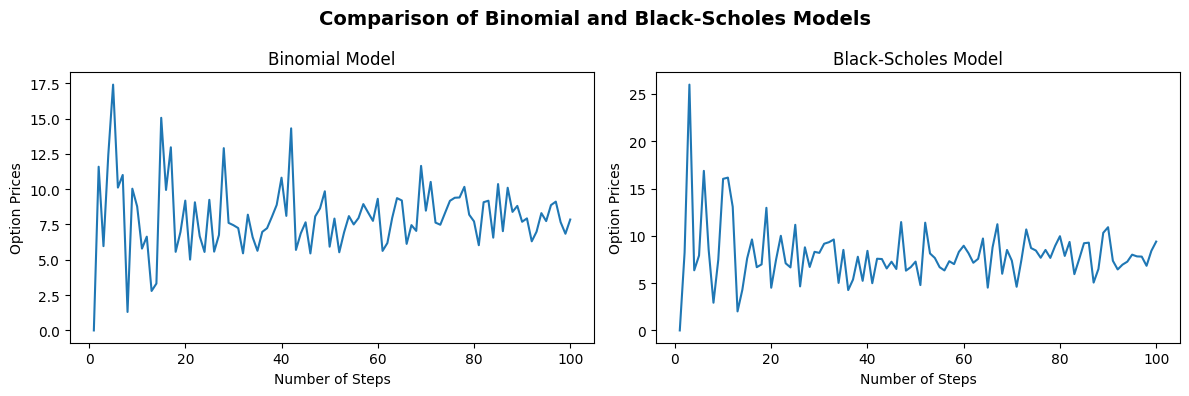

In [6]:
# This code block is for the comparison of the two models as the number of steps increase.
num_runs = 101

binomial_option_values = [monte_carlo_black_scholes_option_pricing(stock_price, strike_price, interest_rate, volatility, expiration_time, i) for i in range(1, num_runs)]
black_scholes_option_values = [monte_carlo_black_scholes_option_pricing(stock_price, strike_price, interest_rate, volatility, expiration_time, j) for j in range(1, num_runs)]

plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(range(1, num_runs), binomial_option_values)
plt.xlabel("Number of Steps")
plt.ylabel("Option Prices")
plt.title("Binomial Model")

plt.subplot(1,2,2)
plt.plot(range(1, num_runs), black_scholes_option_values)
plt.xlabel("Number of Steps")
plt.ylabel("Option Prices")
plt.title("Black-Scholes Model")

plt.suptitle("Comparison of Binomial and Black-Scholes Models", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()